In [159]:
import h5py

import numpy as np

from pathlib import Path

import os

import os.path

import matplotlib as mpl

from matplotlib import pyplot as plt

import matplotlib.patches 

from scipy import ndimage

In [160]:
os.chdir('/Users/niloo/Desktop/LCLS/CXI/cxi25410/res/iceFinderCampaign/output_r0144/type1')
os.getcwd()

'/Users/niloo/Desktop/LCLS/CXI/cxi25410/res/iceFinderCampaign/output_r0144/type1'

In [161]:
f=h5py.File('LCLS_2011_Feb28_r0144_163146_bba4_cspad.h5','r')

In [162]:
g=h5py.File('LCLS_2011_Feb28_r0144_163146_bba4_cspad-angavg.h5','r')

In [163]:
f.keys()
f['LCLS'].keys()
d=f['data/data'][:]

In [164]:
g.keys()
g['data'].keys()
b=g['data/data'][:]

In [184]:
#Set everything below the average to zero:
angave = 90.0
d_ave = np.copy(d)
d_ave[d_ave<angave] = 0

In [185]:
labeled_image, number_of_objects = scipy.ndimage.label(d_ave)
peak_slices = scipy.ndimage.find_objects(labeled_image)

In [186]:
def centroid(data):
    h,w = np.shape(data)   
    x = np.arange(0,w)
    y = np.arange(0,h)

    X,Y = np.meshgrid(x,y)

    cx = np.sum(X*data)/np.sum(data)
    cy = np.sum(Y*data)/np.sum(data)
    return cx,cy

centroids = []

In [200]:
centroids = scipy.ndimage.center_of_mass(d_ave, labeled_image,np.arange(1, number_of_objects + 1))
centroids = [(j, i) for i, j in centroids]

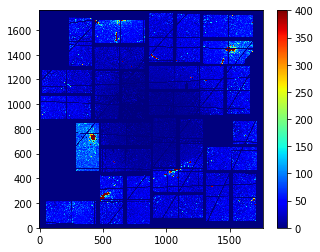

In [201]:
#Now make the plots:

plt.figure(figsize=[5,4])
plt.imshow(d,origin='lower',cmap='jet',aspect='auto')
plt.colorbar()
plt.clim(vmin=0,vmax=400)
plt.show()

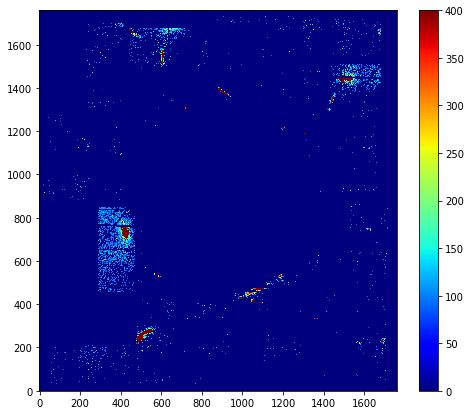

In [202]:
plt.figure(figsize=[8,7])
plt.imshow(d_ave,origin='lower',cmap='jet',aspect='auto')
plt.colorbar()
plt.clim(vmin=0,vmax=400)
plt.show()